<h1><center> DEEP Q NETWORKS WITH KERAS </center></h1>
<h2><center> THE AI MOUNTAIN CAR EXAMPLE </center></h2>

This section comes from **Patel, Y (2017), `Reinforcement Learning w/ Keras + OpenAI: DQNs`** The reference can be found at:

https://towardsdatascience.com/reinforcement-learning-w-keras-openai-dqns-1eed3a5338c




## 1. DQN THEORY BACKGROUND


**Q-learning (which doesn’t stand for anything, by the way):**

**`is centered around creating a “virtual table” that accounts for how much reward is assigned to each possible action given the current state of the environment. Let’s break that down one step at a time:`**


What do we mean by “virtual table?” Imagine that for each possible configuration of the input space, you have a table that assigns a score for each of the possible actions you can take. If this were magically possible, then it would be extremely easy for you to “beat” the environment: simply choose the action that has the highest score! Two points to note about this score. 

First, this score is conventionally referred to as the “Q-score,” which is where the name of the overall algorithm comes from. Second, as with any other score, these Q score have no meaning outside the context of their simulation. That is, they have no absolute significance, but that’s perfectly fine, since we solely need it to do comparisons.

Why then do we need virtual table for each input configuration? Why can’t we just have one table to rule them all? The reason is that it doesn’t make sense to do so: that would be the same as saying the best action to take while at the bottom of the valley is exactly that which you should take when you are perched on the highest point of the left incline.

Now, the main problem with what I described (maintaining a virtual table for each input configuration) is that this is impossible: we have a continuous (infinite) input space! We could get around this by discretizing the input space, but that seems like a pretty hacky solution to this problem that we’ll be encountering over and over in future situations. So, how do we get around this? By applying neural nets to the situation: that’s where the D in DQN comes from!


**DQN Agent**
So, we’ve now reduced the problem to finding a way to assign the different actions Q-scores given the current state. This is the answer to a very natural first question to answer when employing any NN: what are the inputs and outputs of our model? The extent of the math you need to understand for this model is the following equation (don’t worry, we’ll break it down):


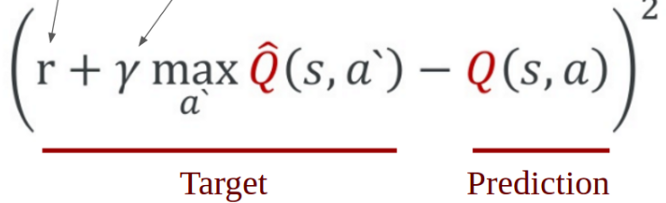



**`Q, as mentioned, represents the value estimated by our model given the current state (s) and action taken (a)`**. 

The goal, however, is to determine the overall value of a state. What do I mean by that? The overall value is both the immediate reward you will get and the expected rewards you will get in the future from being in that position. That is, we want to account for the fact that the value of a position often reflects not only its immediate gains but also the future gains it enables (damn, deep). In any case, we discount future rewards because, if I compare two situations in which I expect to get $100 one of the two being in the future, I would always take the present deal, since the position of the future one may change between when I made the deal and when I receive the money. The gamma factor reflects this depreciated value for the expected future returns on the state.
And that’s it: that’s all the math we’ll need for this! Time to actually move on to some code!


**DQN Agent Implementation**


The Deep Q Network revolves around continuous learning, meaning that we don’t simply accrue a bunch of trial/training data and feed it into the model. Instead, we create training data through the trials we run and feed this information into it directly after running the trial. If this all seems somewhat vague right now, don’t worry: time to see some code about this. The code largely revolves around defining a DQN class, where all the logic of the algorithm will actually be implemented, and where we expose a simple set of functions for the actual training.


**DQN Hyperparameters**


First off, we’re going to discuss some parameters of relevance for DQNs. Most of them are standard from most neural net implementations:

Let’s step through these one at a time. The first is simply the environment, which we supply for convenience when we need to reference the shapes in creating our model. The “memory” is a key component of DQNs: as mentioned previously, the trials are used to continuously train the model. However, rather than training on the trials as they come in, we add them to memory and train on a random sample of that memory. Why do this instead of just training on the last x trials as our “sample?” The reason is somewhat subtle. 

Imagine instead we were to just train on the most recent trials as our sample: in this case, our results would only learn on its most recent actions, which may not be directly relevant for future predictions. In this environment in particular, if we were moving down the right side of the slope, training on the most recent trials would entail training on the data where you were moving up the hill towards the right. But, this would not be at all relevant to determining what actions to take in the scenario you would soon be facing of scaling up the left hill. So, by taking a random sample, we don’t bias our training set, and instead ideally learn about scaling all environments we would encounter equally well.


So, we now discuss hyperparameters of the model: gamma, epsilon/epsilon decay, and the learning rate. The first is the future rewards depreciation factor (<1) discussed in the earlier equation, and the last is the standard learning rate parameter, so I won’t discuss that here. The second, however, is an interesting facet of RL that deserves a moment to discuss. In any sort of learning experience, we always have the choice between exploration vs. exploitation. This isn’t limited to computer science or academics: we do this on a day to day basis!


Consider the restaurants in your local neighborhood. When was the last time you went to a new one? Probably a long time ago. That corresponds to your shift from exploration to exploitation: rather than trying to find new and better opportunities, you settle with the best one you’ve found in your past experiences and maximize your utility from there. Contrast that to when you moved into your house: at that time, you had no idea what restaurants were good or not and so were enticed to explore your options. In other words, there’s a clear trend for learning: explore all your options when you’re unaware of them, and gradually shift over to exploiting once you’ve established opinions on some of them. In the same manner, we want our model to capture this natural model of learning, and epsilon plays that role.


Epsilon denotes the fraction of time we will dedicate to exploring. That is, a fraction self.epsilon of the trials, we will simply take a random action rather than the one we would predict to be the best in that scenario. As stated, we want to do this more often than not in the beginning, before we form stabilizing valuations on the matter, and so initialize epsilon to close to 1.0 at the beginning and decay it by some fraction <1 at every successive time step.


**DQN Models**

There was one key thing that was excluded in the initialization of the DQN above: the actual model used for predictions! As in our original Keras RL tutorial, we are directly given the input and output as numeric vectors. So, there’s no need to employ more complex layers in our network other than fully connected layers. Specifically, we define our model just as:


The fact that there are two separate models, one for doing predictions and one for tracking “target values” is definitely counter-intuitive. To be explicit, the role of the model (self.model) is to do the actual predictions on what action to take, and the target model (self.target_model) tracks what action we want our model to take.


Why not just have a single model that does both? After all, if something is predicting the action to take, shouldn’t it be implicitly determine what model we want our model to take? This is actually one of those “weird tricks” in deep learning that DeepMind developed to get convergence in the DQN algorithm. If you use a single model, it can (and often does) converge in simple environments (such as the CartPole). But, the reason it doesn’t converge in these more complex environments is because of how we’re training the model: as mentioned previously, we’re training it “on the fly.”


As a result, we are doing training at each time step and, if we used a single network, would also be essentially changing the “goal” at each time step. Think of how confusing that would be! That would be like if a teacher told you to go finish pg. 6 in your textbook and, by the time you finished half of it, she changed it to pg. 9, and by the time you finished half of that, she told you to do pg. 21! This, therefore, causes a lack of convergence by a lack of clear direction in which to employ the optimizer, i.e. the gradients are changing too rapidly for stable convergence. So, to compensate, we have a network that changes more slowly that tracks our eventual goal and one that is trying to achieve those.


**DQN Training**


The training involves three main steps: remembering, learning, and reorienting goals. The first is basically just adding to the memory as we go through more trials:
There’s not much of note here other than that we have to store the done phase for how we later update the reward function. Moving on to the main body of our DQN, we have the train function. This is where we make use of our stored memory and actively learn from what we’ve seen in the past. We start by taking a sample from our entire memory storage. From there, we handle each sample different. As we saw in the equation before, we want to update the Q function as the sum of the current reward and expected future rewards (depreciated by gamma). In the case we are at the end of the trials, there are no such future rewards, so the entire value of this state is just the current reward we received. In a non-terminal state, however, we want to see what the maximum reward we would receive would be if we were able to take any possible action, from which we get:

And finally, we have to reorient our goals, where we simply copy over the weights from the main model into the target one. Unlike the main train method, however, this target update is called less frequently:


**Training Agent**


Training the agent now follows naturally from the complex agent we developed. We have to instantiate it, feed it the experiences as we encounter them, train the agent, and update the target network:


## 2.  COMPLETE CODE

With that, here is the complete code used for training against the “MountainCar-v0” environment using DQN!


In [1]:
import gym
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from collections import deque

class DQN:
    def __init__(self, env):
        self.env     = env
        self.memory  = deque(maxlen=2000)
        
        self.gamma = 0.85
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.005
        self.tau = .125

        self.model        = self.create_model()
        self.target_model = self.create_model()

    def create_model(self):
        model   = Sequential()
        state_shape  = self.env.observation_space.shape
        model.add(Dense(24, input_dim=state_shape[0], activation="relu"))
        model.add(Dense(48, activation="relu"))
        model.add(Dense(24, activation="relu"))
        model.add(Dense(self.env.action_space.n))
        model.compile(loss="mean_squared_error",
            optimizer=Adam(lr=self.learning_rate))
        return model

    def act(self, state):
        self.epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon_min, self.epsilon)
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.model.predict(state)[0])

    def remember(self, state, action, reward, new_state, done):
        self.memory.append([state, action, reward, new_state, done])

    def replay(self):
        batch_size = 32
        if len(self.memory) < batch_size: 
            return

        samples = random.sample(self.memory, batch_size)
        for sample in samples:
            state, action, reward, new_state, done = sample
            target = self.target_model.predict(state)
            if done:
                target[0][action] = reward
            else:
                Q_future = max(self.target_model.predict(new_state)[0])
                target[0][action] = reward + Q_future * self.gamma
            self.model.fit(state, target, epochs=1, verbose=0)

    def target_train(self):
        weights = self.model.get_weights()
        target_weights = self.target_model.get_weights()
        for i in range(len(target_weights)):
            target_weights[i] = weights[i] * self.tau + target_weights[i] * (1 - self.tau)
        self.target_model.set_weights(target_weights)

    def save_model(self, fn):
        self.model.save(fn)

def main():
    env     = gym.make("MountainCar-v0")
    gamma   = 0.9
    epsilon = .95

    trials  = 1000
    trial_len = 500

    # updateTargetNetwork = 1000
    dqn_agent = DQN(env=env)
    steps = []
    for trial in range(trials):
        cur_state = env.reset().reshape(1,2)
        for step in range(trial_len):
            action = dqn_agent.act(cur_state)
            new_state, reward, done, _ = env.step(action)

            # reward = reward if not done else -20
            new_state = new_state.reshape(1,2)
            dqn_agent.remember(cur_state, action, reward, new_state, done)
            
            dqn_agent.replay()       # internally iterates default (prediction) model
            dqn_agent.target_train() # iterates target model

            cur_state = new_state
            if done:
                break
        if step >= 199:
            print("Failed to complete in trial {}".format(trial))
            if step % 10 == 0:
                dqn_agent.save_model("trial-{}.model".format(trial))
        else:
            print("Completed in {} trials".format(trial))
            dqn_agent.save_model("success.model")
            break

if __name__ == "__main__":
    main()

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Program Files\Anaconda\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Failed to complete in trial 0
Failed to complete in trial 1
Failed to complete in trial 2
Failed to complete in trial 3
Failed to complete in trial 4
Failed to complete in trial 5
Failed to complete in trial 6
Failed to complete in trial 7
Failed to complete in trial 8
Failed to complete in trial 9
Failed to complete in trial 10
Failed to complete in trial 11
Failed to complete in trial 12
Failed to complete in trial 13
Failed to complete in trial 14
Failed to complete in trial 15
Failed to complete in trial 16
Failed to complete in trial 17
Failed to complete in trial 18
Failed to complete in trial 19
Failed to complete in trial 20
Failed to complete in trial 21
Failed to complete in trial 22
Failed to complete in trial 23
Failed to complete in trial 24
Failed to complete in trial 25
Failed to complete in trial 26
Failed to complete in trial 27
Failed to complete in 

In [11]:
from keras.models import load_model

In [12]:
model = load_model('success.model')

In [14]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_add_unique_metric_name',
 '_base_init',
 '_build_input_shape',
 '_built',
 '_cache_output_metric_attributes',
 '_check_trainable_weights_consistency',
 '_collected_trainable_weights',
 '_compile_metric_functions',
 '_compile_metrics',
 '_compile_weighted_metrics',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_feed_loss_fns',
 '_feed_output_names',
 '_feed_output_shapes',
 '_feed_outputs',
 '_feed_sample_weight_modes',
 '_feed_sample_weights',
 '_feed_targets',
 '_function_kwargs',


In [18]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x000001905D3EAFD0>>